# 2025-2 INSIGHT 5차 심화세션 사전학습 과제
## 언어 모델 & 생성 모델

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 언어모델 </span>

##### 통계 기반 모델 (SLM)

초기 언어 모델. 문장의 확률을 계산하기 위해 통계적 방법을 사용.

```
N-gram

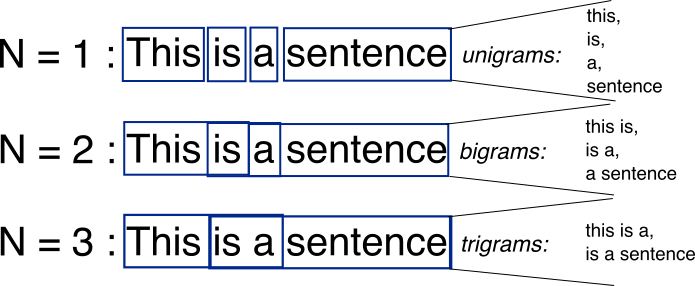

- 정의: 문장의 확률을 "이전 N-1개의 단어가 주어졌을 때 다음 단어가 등장할 확률"의 연쇄로 근사하는 모델.
- "N개의 단어 뭉치"가 함께 등장하는 빈도를 기반으로 확률을 계산.
  - Unigram (1-gram): $P(\text{I, am, a, boy}) \approx P(\text{I}) \times P(\text{am}) \times P(\text{a}) \times P(\text{boy})$ (단어 순서 무시)
  - Bigram (2-gram): $P(\text{I, am, a, boy}) \approx P(\text{I}) \times P(\text{am}|\text{I}) \times P(\text{a}|\text{am}) \times P(\text{boy}|\text{a})$

- 한계:
  - 희소성 문제: 학습 데이터에 등장하지 않은 N-gram 조합은 확률이 0이 됨. (e.g., "매우 훌륭한"은 많아도 "매우 훌륭했었던"은 0일 수 있음)
  - 문맥 길이의 한계: N을 크게 하면 희소성 문제가 심해지고, N을 작게 하면 장기 의존성(long-term dependency)을 학습할 수 없음. (e.g., "나는 프랑스에서 태어났고... 그래서 모국어는 프랑스어입니다." > 2-gram으로는 '모국어는' 다음에 '프랑스어'가 올 확률을 알기 어려움)

```
PPL

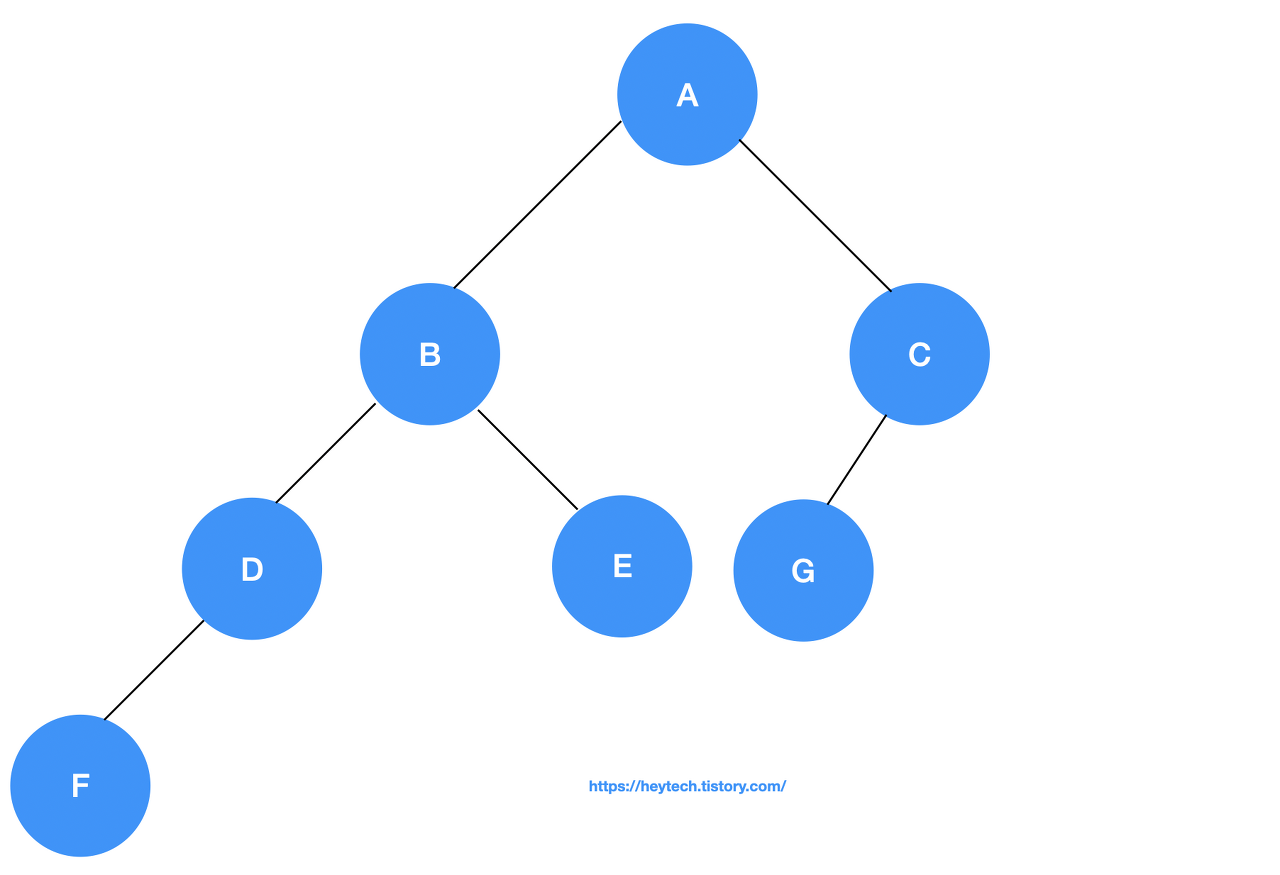

- 정의: 언어 모델의 성능을 측정하는 지표. "헷갈림의 정도"를 의미.
- PPL이 낮을수록 모델이 다음 단어를 예측할 때 덜 헷갈린다는(확신도가 높다는) 뜻이며, 이는 문장의 확률을 높게 예측한다는 것. (낮을수록 좋은 모델)
- 문장 확률의 역수에 단어 수만큼 거듭제곱근을 취한 값. (Cross-Entropy의 지수(exponential) 값과 동일)

$PPL(W) = P(w_1, w_2, ..., w_N)^{-\frac{1}{N}} = \sqrt[N]{\frac{1}{P(w_1, w_2, ..., w_N)}}$

##### 딥러닝 기반 모델

```
BERT

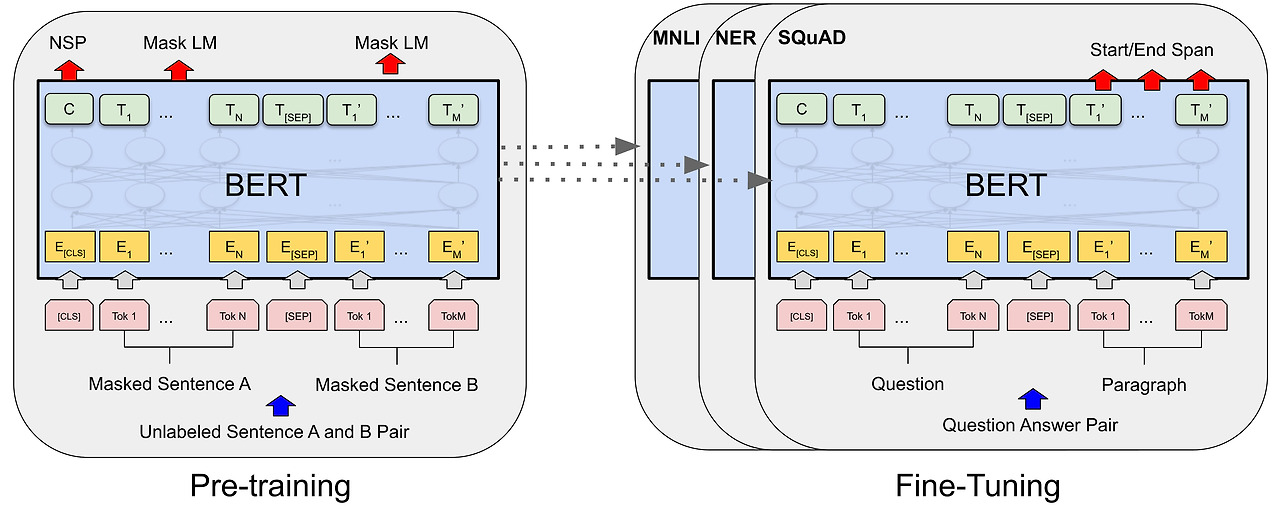

특징:

- 양방향(Bidirectional): 문장 전체의 문맥을 처음부터 끝까지 동시에 고려. (GPT가 단방향인 것과 대비됨)

- 인코더(Encoder-only): 트랜스포머의 인코더 구조만을 사용하여 문맥을 '이해'하고 '표현'(Representation)하는 데 집중. (분류, 개체명 인식 등 NLU 태스크에 강력함)

- 사전학습-미세조정(Pre-train & Fine-tune): 거대한 말뭉치로 일반적인 언어 이해 능력을 사전학습한 뒤, 특정 태스크(e.g., 감성분석)에 맞는 소규모 데이터로 미세조정.

```
BERT w/MLM

- 목적: 양방향 문맥 학습
- 일부 단어를 [MASK] 토큰으로 무작위로 가리고 모델이 주변 문맥을 이용해 원래 단어가 뭐였는지 맞히게 함.
- 입력: 나는 [MASK]에 가서 밥을 먹었다. -> 정답: [MASK] = 식당
- 모델이 [MASK]를 예측하기 위한 앞뒤 단어를 모두 참조해야 하므로 깊은 문맥 이해 능력을 학습.

```
BERT w/ NSP

- 목적: 문장과 문장 사이의 관계 학습
- 두 개의 문장을 주고 B가 A의 다음 문장인지 아닌지를 이진 분류로 맞히게 함
- 예시:
  - 입력 A: 나는 배가 고팠다. / 입력 B: 그래서 식당에 갔다. -> 정답: IsNext
  - 입력 A: 나는 배가 고팠다. / 입력 B: 하늘은 파랗다. -> 정답: NotNext
- 이후 연구(RoBERTa 등)에서 NSP가 실제 성능 향상에 큰 도움이 되지 않는다는 것이 밝혀져, 최근 모델에서는 제거되거나 다른 방식(e.g., SOP)으로 대체됨.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> LLM </span>

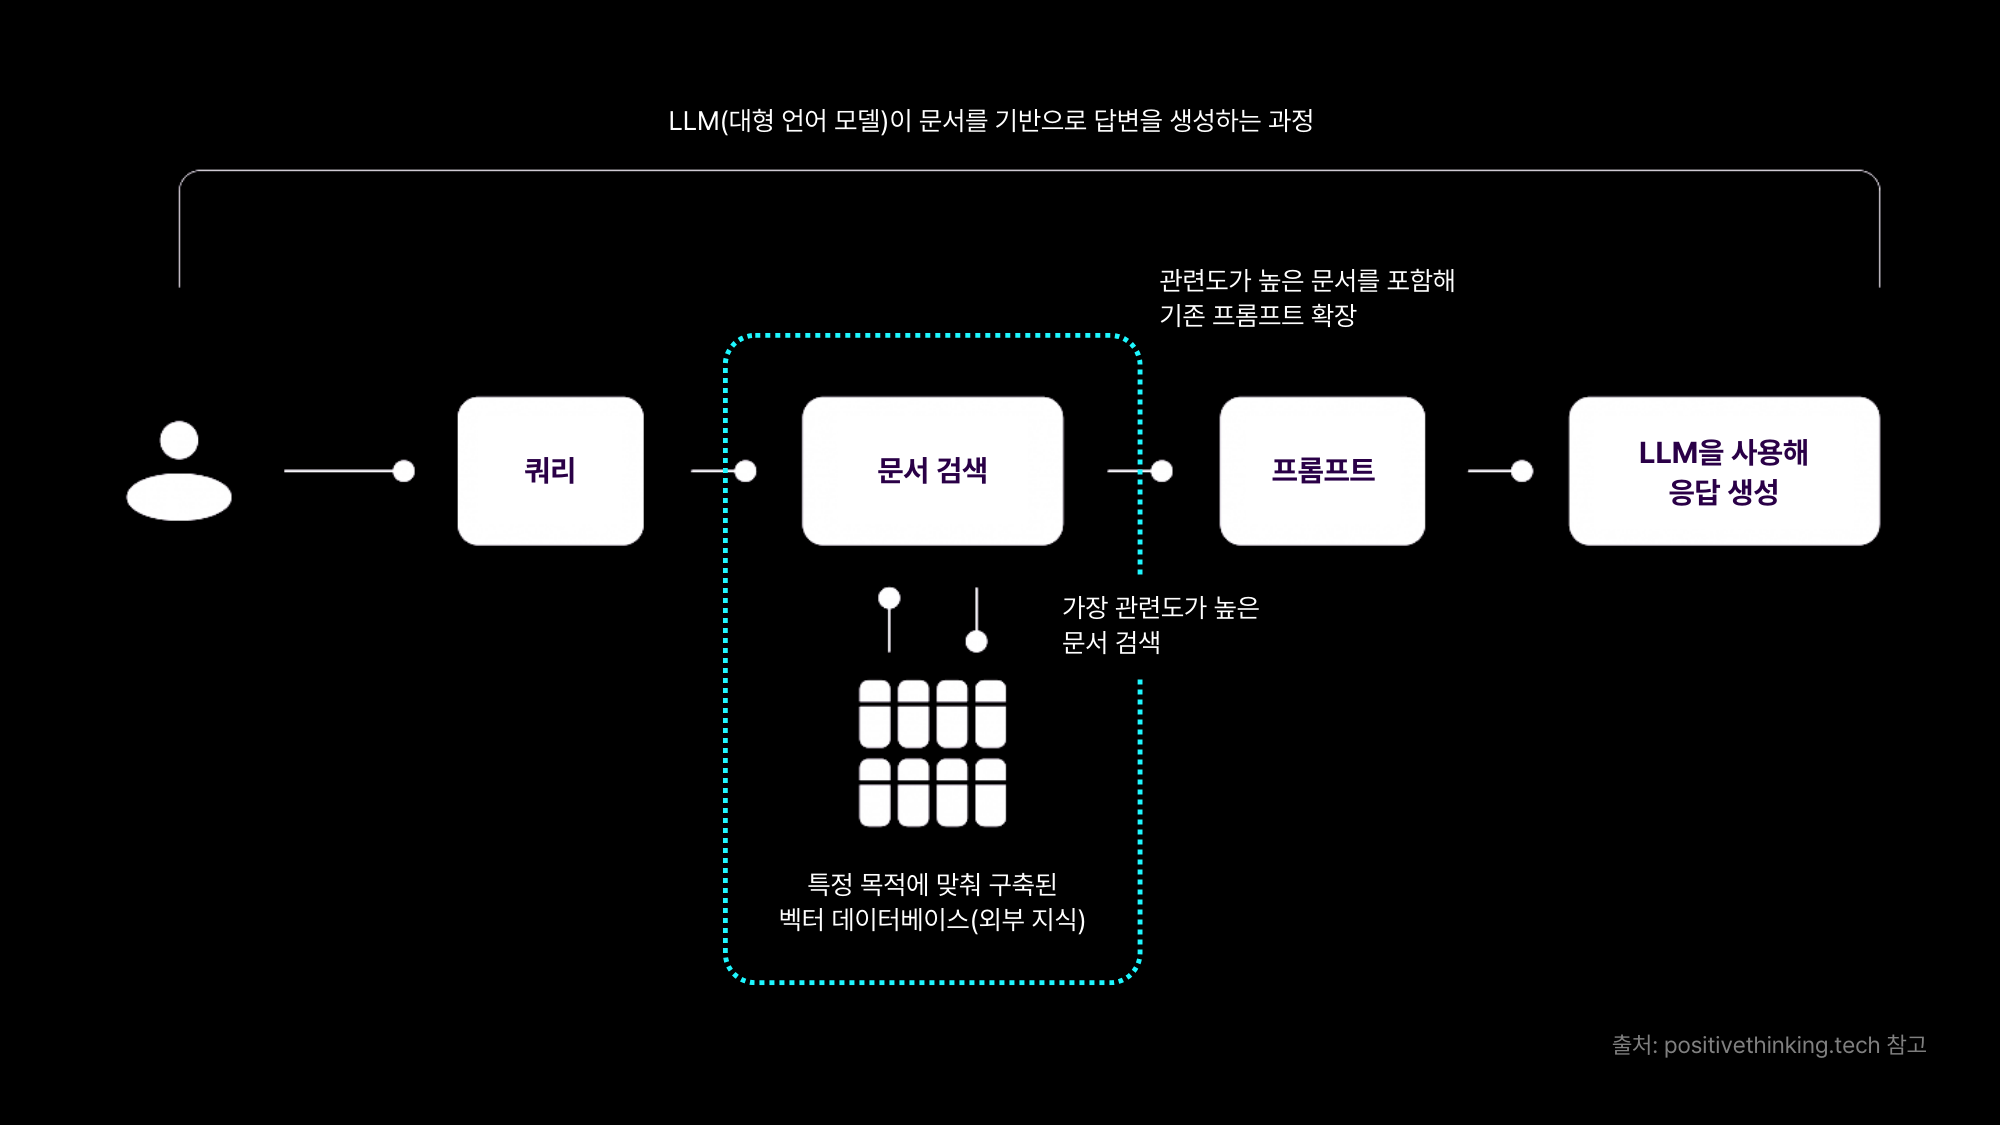

```
GPT

- 특징:
  - 단방향(Uni-directional / Auto-regressive): 트랜스포머의 디코더(Decoder-only) 구조를 사용.
  - 자기회귀(Auto-regressive): 이전 단어들까지만 보고 다음 단어를 예측하는 과정을 반복. (나 -> 는 -> 밥 -> 을...)
  - 생성(Generative): 문맥을 이해하는 것을 넘어, 다음 단어를 순차적으로 생성하여 새로운 텍스트(문장, 기사, 코드)를 만들어내는 데 특화됨.

```
LLM의 한계

1. 환각: 사실에 근거하지 않거나, 존재하지 않는 정보를 그럴듯하게 지어내는 현상.
2. 지식의 최신성: 특정 시점까지의 데이터로 학습되므로, 그 이후의 최신 정보를 알지 못함.
3. 높은 비용: 학습과 추론에 막대한 컴퓨팅 자원과 비용이 소모됨.
4. 편향성: 학습 데이터에 내재된 편향(인종, 성별, 직업 등)을 그대로 학습하고 증폭할 수 있음.
5. 맥락의 한계: 한 번에 처리할 수 있는 입력 토큰의 수가 제한됨 (최근 K-Token으로 증가하고 있으나 여전히 한계 존재)

```
RAG

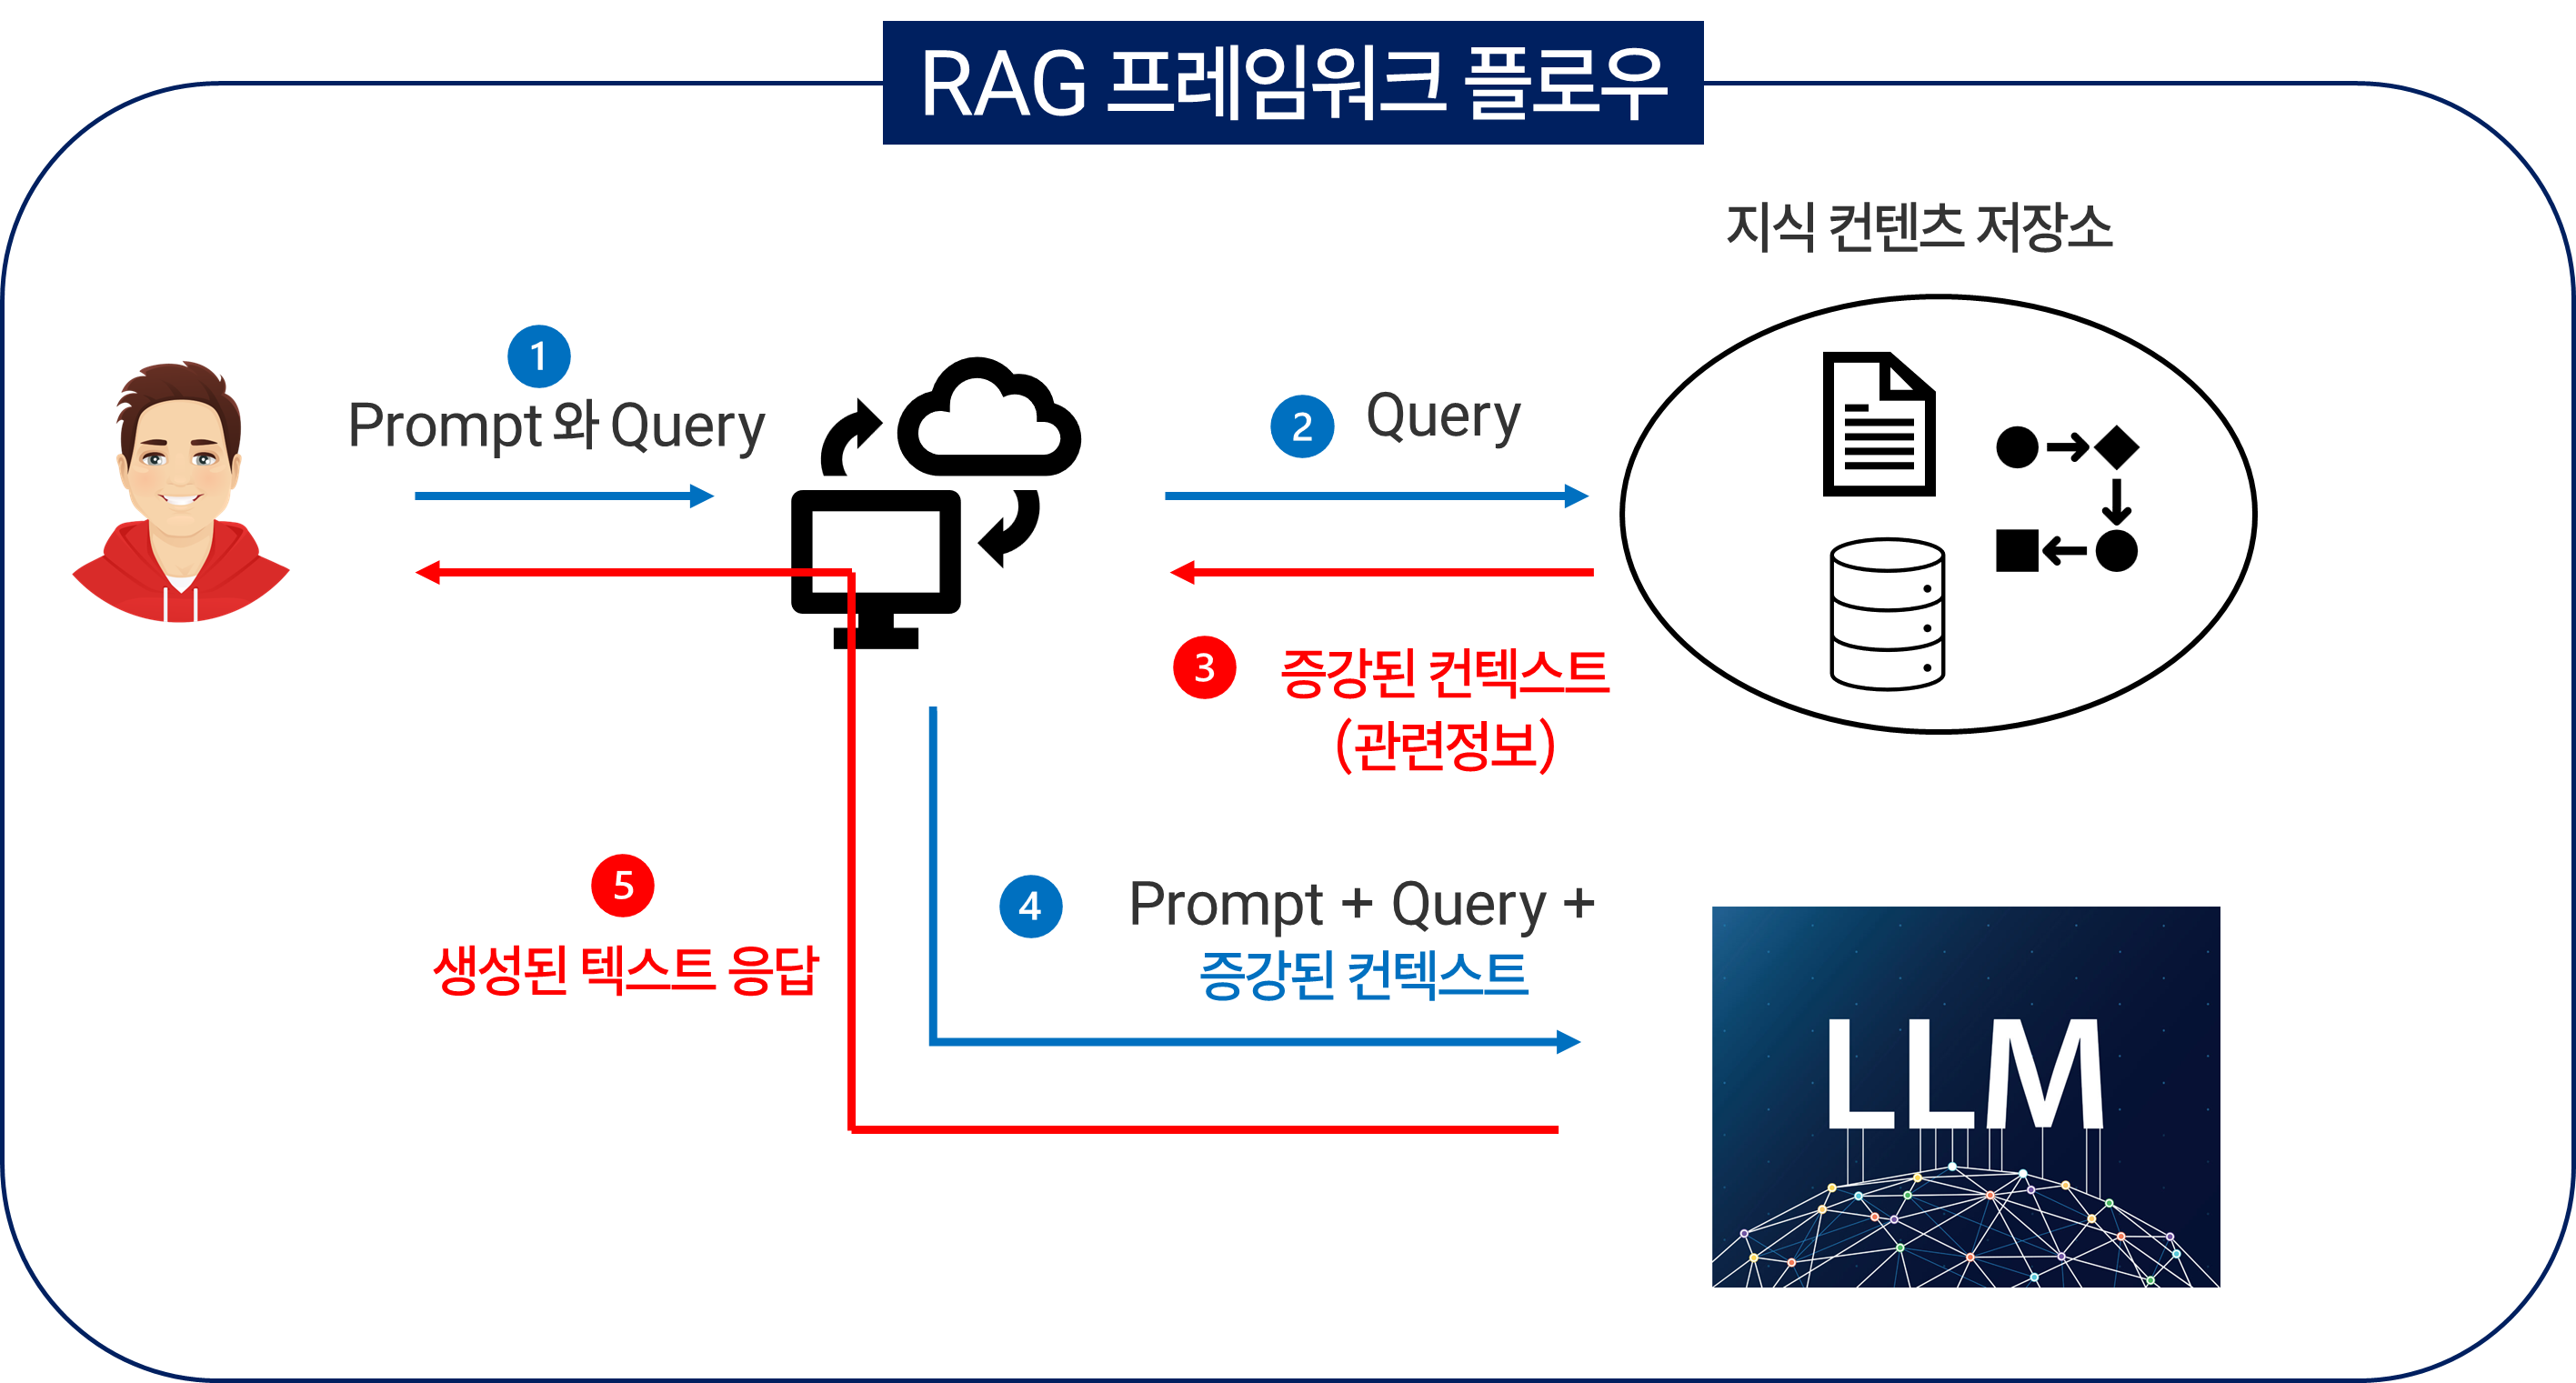

- 개념: LLM의 한계를 보완하기 위해, 모델을 재학습
- LLM이 모르는 질문을 받으면 먼저 검색 > 검색된 걸 LLM에게 참고자료로 함께 제공 > 답변 생성

### 구조
<br>
- 인덱싱:
    <br>
    - 외부 문서를 의미 단위로 잘게 쪼갬
<br>
  - 각 조각을 임베딩 모델을 통해 벡터로 변환
<br>
  - 이 벡터들을 벡터 데이터베이스에 저장
<br>
- 검색:
  <br>
  - Query가 들어오면 질문을 임베딩 벡터로 변환
  <br>
  - 벡터 데이터베이스에서 질문 벡터와 가장 가까운 문서 조각 벡터 검색
<br>
- 증강 및 생성:
  <br>
  - 검색된 문서 내용을 원래 질문과 결합하여 프롬프트 재구성
<br>
  - LLM이 이 프롬프트를 기반으로 사실에 근거한 답변을 생성

```
Langchain

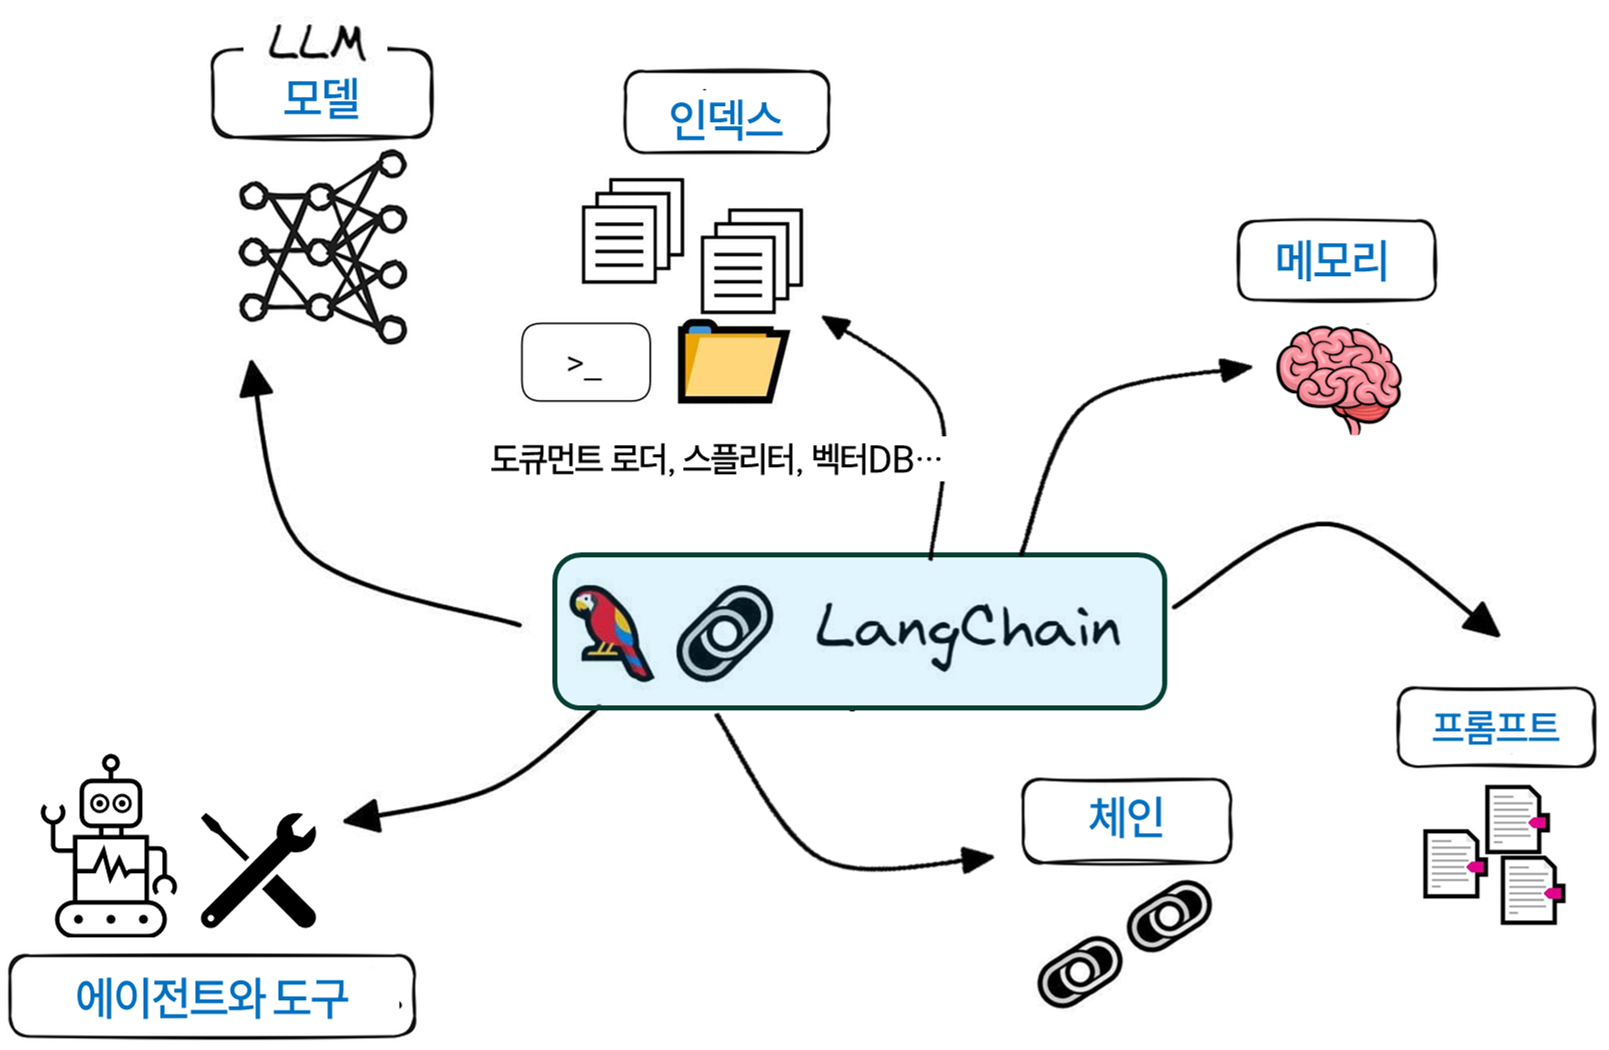

LLM을 기반으로 복잡한 애플리케이션을 쉽게 개발하도록 돕는 프레임워크
<BR>
LLM을 단독으로 사용하는 게 아니라 외부 데이터, 다른 API, 계산 모듈 등과 연결하여 더 강력한 작업을 수행하게 함

- Models: LLM 모델 자체 (e.g., GPT-4, Claude)
- Prompts: LLM에 입력을 효과적으로 지시하는 템플릿.
- Chains: 여러 컴포넌트(LLM, 프롬프트, 외부 도구)를 순차적으로 연결하는 파이프라인. (e.g., RAG가 대표적인 Chain)
- Agents: LLM이 '생각'을 하고, 어떤 '도구'(Tool, e.g., 구글 검색, 계산기)를 사용해야 할지 스스로 결정하고 행동하게 만듦.
- Document Loaders / Vector Stores: RAG를 구현하기 위한 문서 로딩 및 벡터 DB 연결 기능.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> sLM </span>

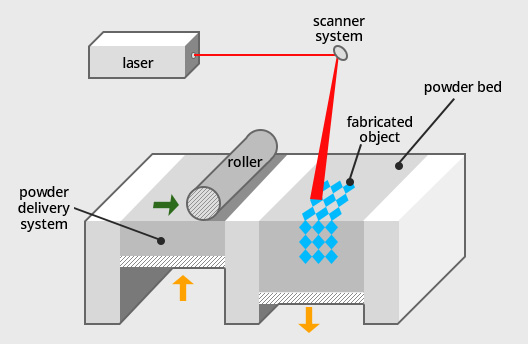

LLM의 막대한 비용과 크기 문제를 해결하기 위해 등장한, 상대적으로 작고 경량화된 언어 모델 (e.g., LLaMA 7B, Phi-3-mini)

```
sLM 모델 압축

:LLM을 sLM으로 만들거나 sLM을 더 경량화하게 위해 사용되는 기술

1. 가지치기: 모델의 성능에 큰 영향을 주지 않는 불필요한 가중치(Weight)나 뉴런을 제거.
2. 양자화: 모델 가중치의 정밀도를 낮춤
3. 지식 증류: 크고 성능이 좋은 LLM의 지식을 작고 가벼운 sLM에게 전달

장점
- 비용 효율성
- 속도
- 원디바이스 구동
- 특화 용이성


단점
- 일반 성능: LLM에 비해 일반적인 지식이나 복잡한 추론 능력이 낮음
- 환각 제어: 여전히 환각 현상이 발생하며, 때로는 LLM보다 제어하기 어려울 수 있음

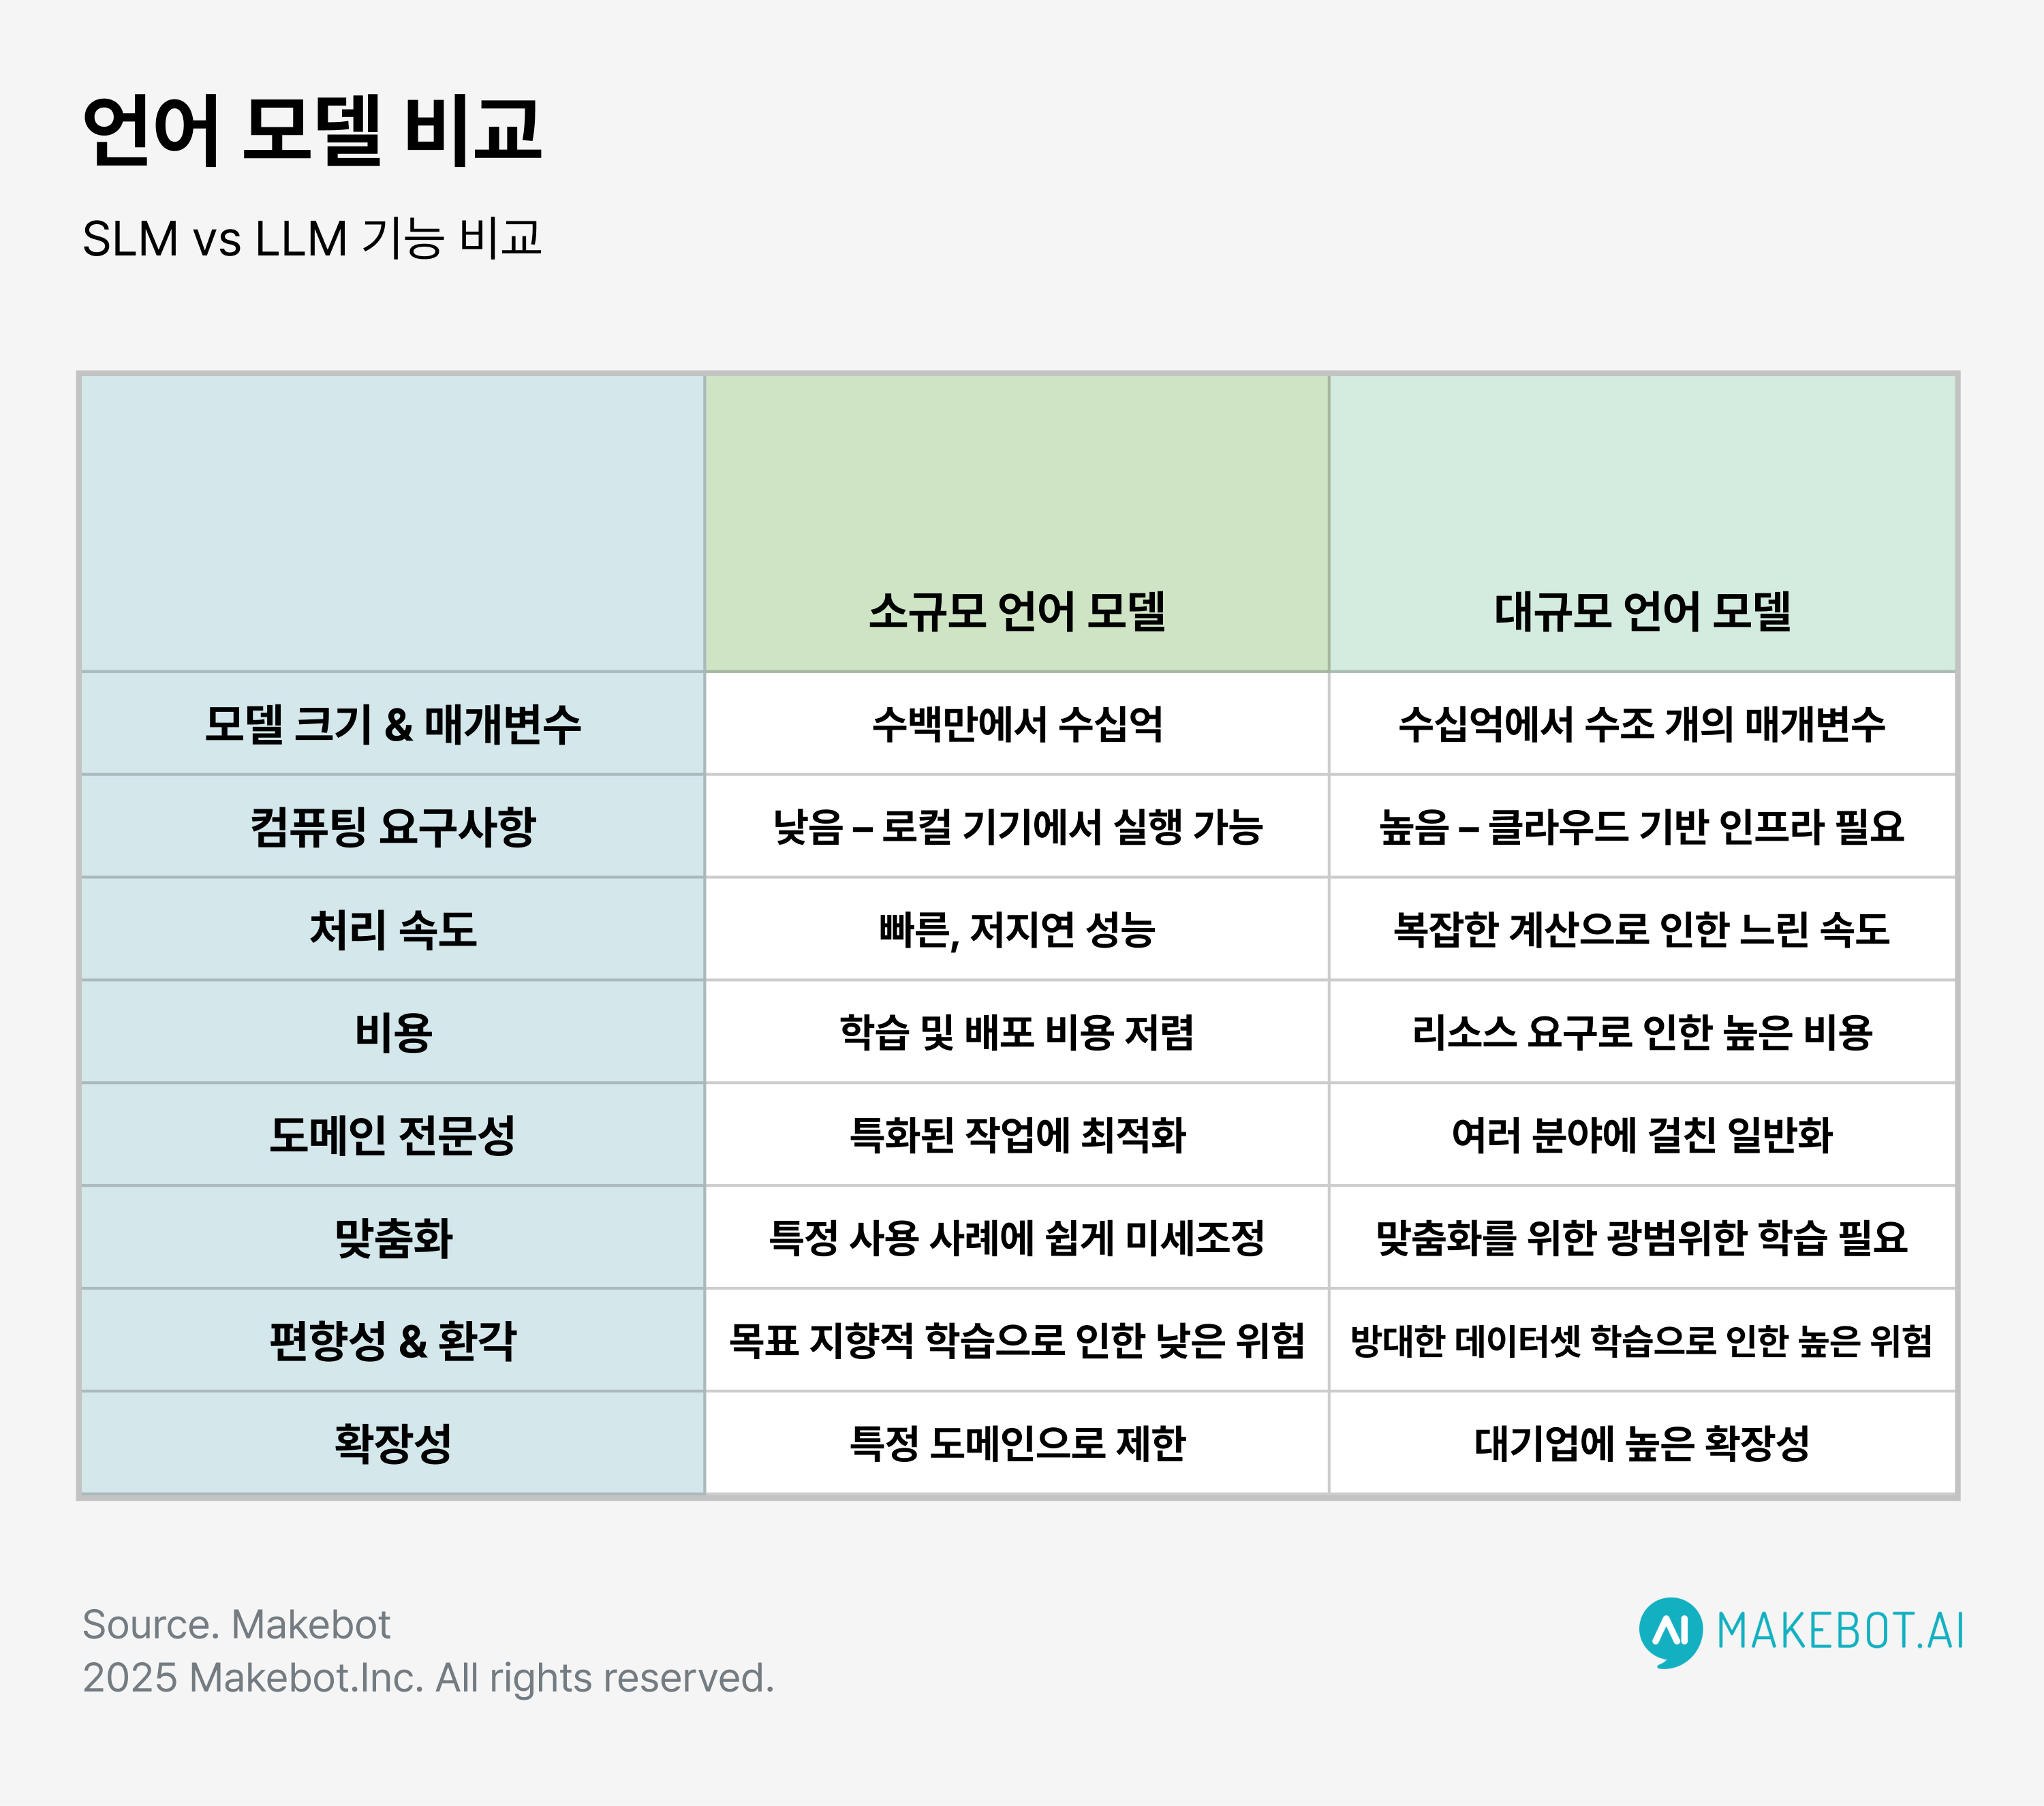

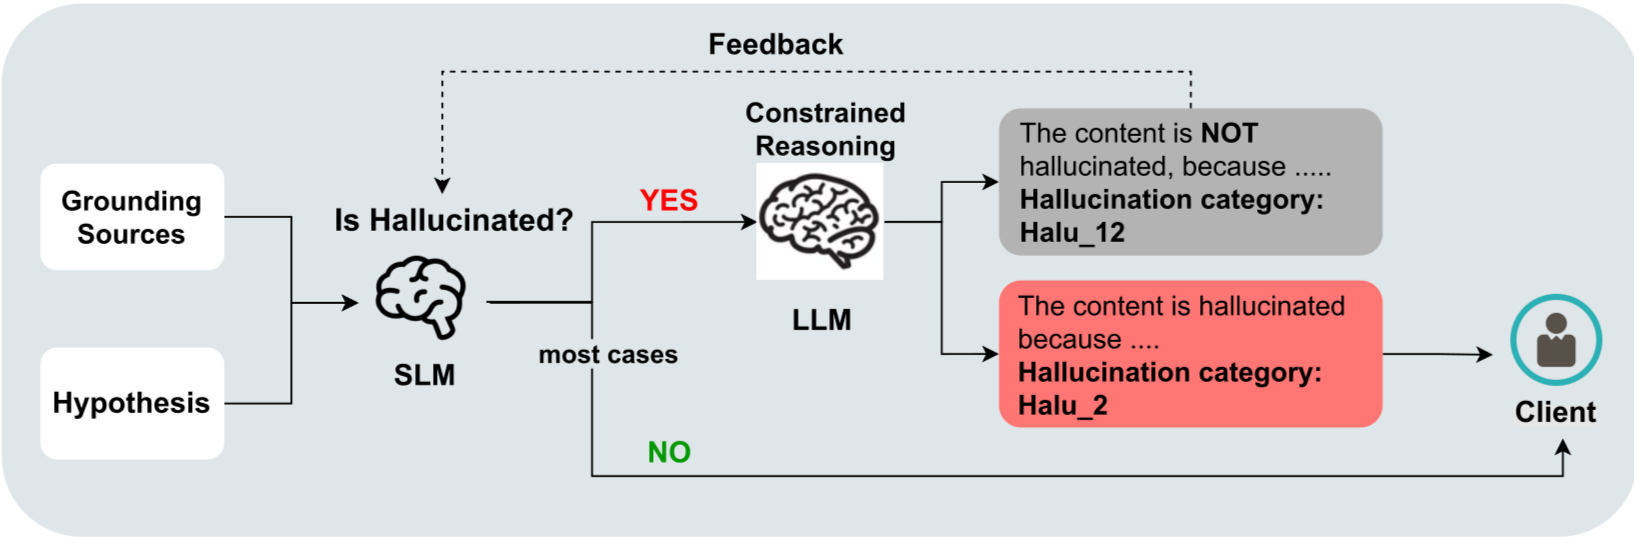

```
sLM과 LLM의 결합

구조 예시
- 라우터 모델: 사용자의 질문을 분석하여 간단한 작업인지 복잡한 작업인지 분류
- sLM (Experts): 간단한 질의, 빠른 응답, 특정 도메인 질의를 처리.
- LLM (Generalist): 복잡한 추론, 창의적인 생성, 일반 상식 질의를 처리.

## <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 생성 모델 </span>

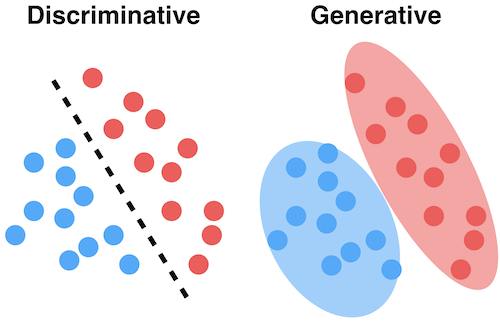

```
AE (오토인코더)

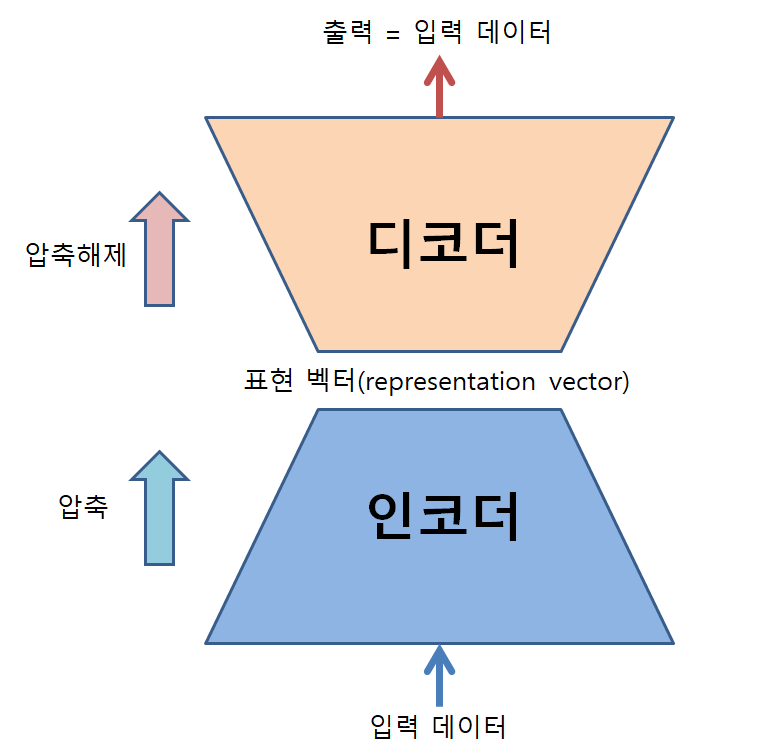

- 구조: 입력 데이터를 압축하는 인코더와 압축된 벡터로부터 원본을 복원하는 디코더로 구성
- 목표: 입력 = 출력
- 한계: Latent Space가 불연속적이고 불규칙할 수 있어 새로운 샘플 생성 모델로는 부적함

```
VAE

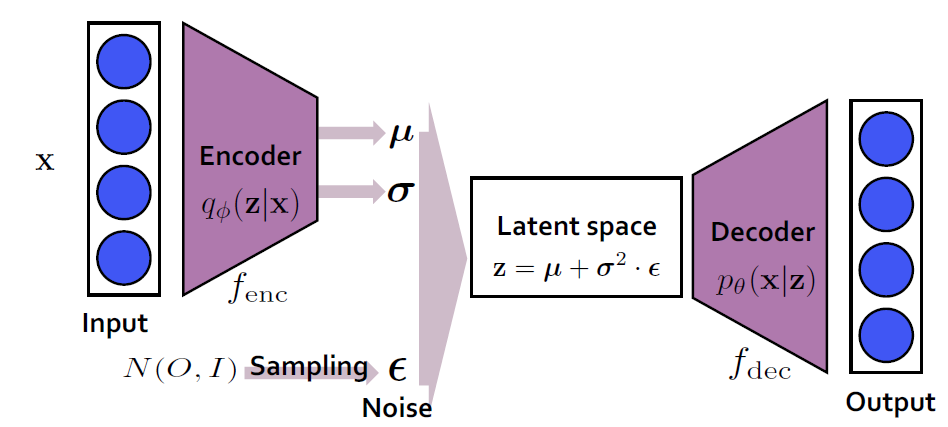

- AE를 확률적으로 발전시킨 진정한 생성 모델
- 인코더가 데이터를 특정 벡터로 압축하는 대신, 데이터가 따를 정규분포의 파라미터(평균 $\mu$, 분산 $\sigma$)를 학습.
- 디코더가 이 정규분포에서 랜덤하게 샘플링($z$)한 벡터를 이용해 새로운 데이터를 생성.
- Latent space가 연속적이라 안정적인 생성이 가능.
- 생성된 결과물이 다소 흐릿함.

```
GAN (생성적 적대 신경망)

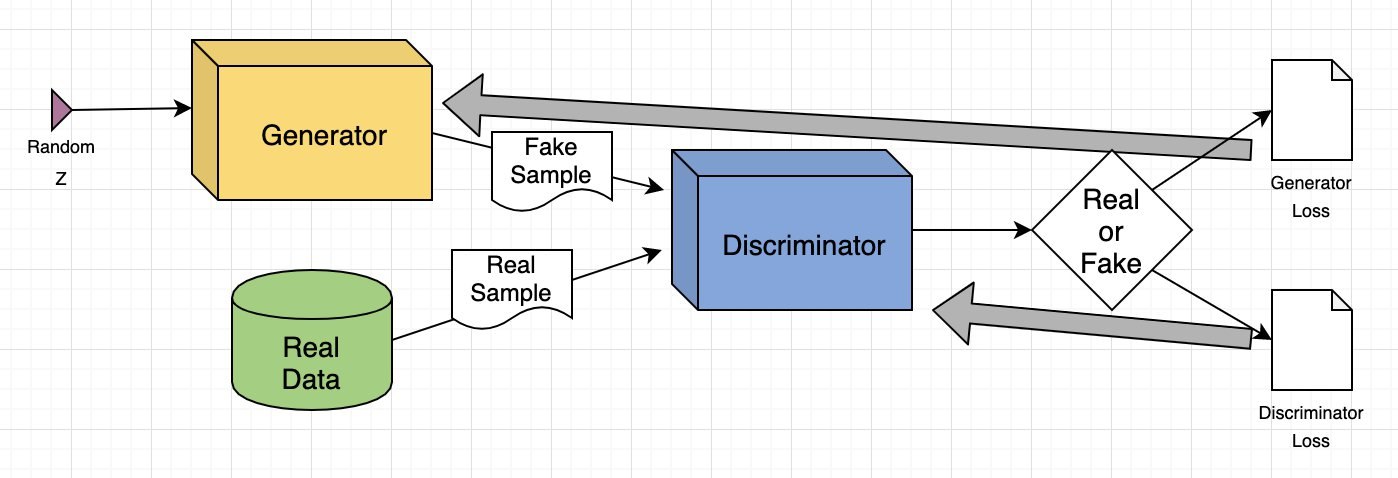

- 구조: 두 개의 네트워크가 서로 경쟁하며 학습
  - 생성자: 가짜 데이터를 생성
  - 판별자: 진짜 데이터와 생성자가 만든 가짜 데이터를 구별

- 학습:
  - 생성자는 판별자를 속이도록 학습
  - 판별자는 생성자에게 속지 않도록 학습

장점: 매우 선명하고(Sharp) 현실적인 결과물 생성.

단점: ① 학습 불안정: 두 네트워크의 균형이 깨지기 쉬움. ② 모드 붕괴 (Mode Collapse): 생성자가 판별자를 속이기 쉬운 하나의 결과물만 계속 생성하는 현상 (다양성 부족).

```
Diffusion Model

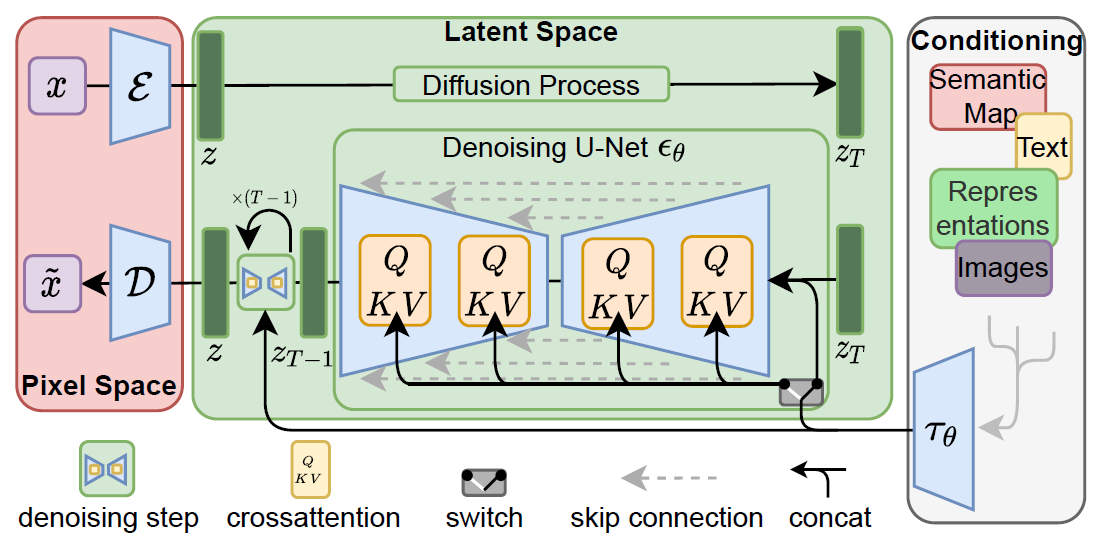

원본 이미지에 노이즈를 추가하는 과정(순확산)을 학습한 뒤, 그 과정을 거꾸로(역확산) 실행하여 노이즈로부터 이미지를 생성하는 모델. (e.g., DALL-E 2, Stable Diffusion)

1. 순확산: 원본 이미지 $x_0$에 점진적으로(T-step) 가우시안 노이즈를 추가하여, 최종적으로 완전한 노이즈 $x_T$를 만듦.

2. 역확산: 이것이 모델(신경망)이 학습하는 부분.
- 노이즈 $x_T$에서 시작하여, 각 단계(t)마다 추가되었던 노이즈를 예측하고 제거.
- $x_T \rightarrow x_{T-1} \rightarrow ... \rightarrow x_1 \rightarrow x_0$ (깨끗한 이미지)